In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
stock_ticker = 'RELIANCE.NS'

In [ ]:
start_year = '2012'
start_month = '01'
start_day = '01'

end_year = '2024'
end_month = '03'
end_day = '24'

In [ ]:
start_date = start_year + '-' + start_month + '-' + start_day
end_date = end_year + '-' + end_month + '-' + end_day

In [ ]:
start_date

'2012-01-01'

In [ ]:
end_date

'2024-03-24'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
num_day_to_predict = 30
num_epochs = 100

In [ ]:
data = yf.download(stock_ticker,start_date,end_date)
#msft = yf.Ticker("MSFT")
#hist = msft.history(period="20mo")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
#hist

In [ ]:
#len(hist)

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,318.553528,324.473816,314.141876,323.010895,294.166168,9404053
2012-01-03,325.616730,332.314240,324.748108,331.285614,301.701996,10244609
2012-01-04,332.542816,334.165741,326.119629,327.399689,298.163116,9270951
2012-01-05,326.873932,331.422760,317.319153,319.787872,291.230957,14479600
2012-01-06,318.667816,330.988434,318.484955,328.039734,298.745911,10287605
...,...,...,...,...,...,...
2024-03-18,2840.000000,2883.449951,2833.050049,2878.949951,2878.949951,4584696
2024-03-19,2857.500000,2875.199951,2834.500000,2850.500000,2850.500000,4137882
2024-03-20,2855.899902,2890.000000,2848.050049,2887.500000,2887.500000,4244403


In [ ]:
training_set = data.iloc[:, 1:2].values

In [ ]:
#training_set

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_train, y_train, epochs = num_epochs, batch_size = 32)

Epoch 1/100
93/93 [==============================] - 17s 111ms/step - loss: 0.0128
Epoch 2/100
93/93 [==============================] - 10s 110ms/step - loss: 0.0028
Epoch 3/100
93/93 [==============================] - 10s 109ms/step - loss: 0.0028
Epoch 4/100
93/93 [==============================] - 10s 111ms/step - loss: 0.0024
Epoch 5/100
93/93 [==============================] - 10s 101ms/step - loss: 0.0023
Epoch 6/100
93/93 [==============================] - 10s 110ms/step - loss: 0.0023
Epoch 7/100
93/93 [==============================] - 11s 122ms/step - loss: 0.0018
Epoch 8/100
93/93 [==============================] - 10s 110ms/step - loss: 0.0021
Epoch 9/100
93/93 [==============================] - 10s 111ms/step - loss: 0.0020
Epoch 10/100
93/93 [==============================] - 9s 98ms/step - loss: 0.0020
Epoch 11/100
93/93 [==============================] - 10s 110ms/step - loss: 0.0018
Epoch 12/100
93/93 [==============================] - 10s 111ms/step - loss: 0.0018
Epo

In [ ]:
dataset_total = data['Open']
inputs = dataset_total[len(dataset_total) - num_day_to_predict - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, (60 + num_day_to_predict)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


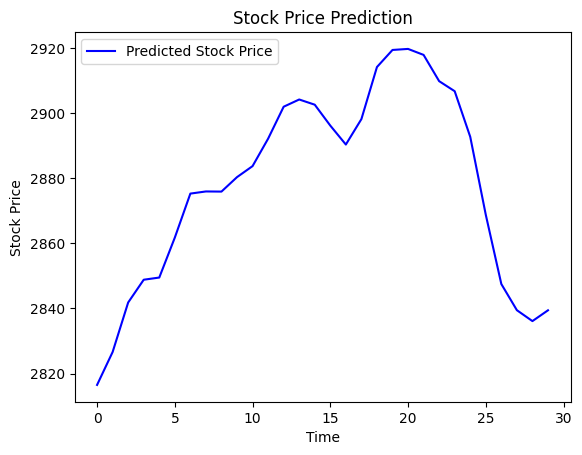

In [ ]:
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()